# Import libraries

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [7]:
# Since we are going to mae lot of visualization, let's set some visualization parameters in order to have same plots size
plt.rcParams['figure.figsize'] = [12,6]
sns.set_style('darkgrid')

# Read data

In [6]:
house = pd.read_csv("/Users/gumber/Documents/Personal_Repository/AI-DataScience-Course/ML/data/Maison.csv")
house.head()

,PRIX,SUPERFICIE,CHAMBRES,SDB,ETAGES,ALLEE,SALLEJEU,CAVE,GAZ,AIR,GARAGES,SITUATION
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0
3,60500,6650,3,1,2,1,1,0,0,0,0,0
4,61000,6360,2,1,1,1,0,0,0,0,0,0


# Data Transformation and Analysis

In [19]:
# Since the columns are in french, in order to make them more readable, let's translate them into English
house = house.rename(index = str, columns = {'PRIX':'price','SUPERFICIE': 'area','CHAMBRES': 'rooms', 
                         'SDB': 'bathroom', 'ETAGES': 'floors','ALLEE': 'driveway',
                         'SALLEJEU':'game_room', 'CAVE': 'cellar', 
                         'GAZ': 'gas', 'AIR':'air', 'GARAGES': 'garage', 'SITUATION': 'situation'})

In [20]:
house.head()

,price,area,rooms,bathroom,floors,driveway,game_room,cellar,gas,air,garage,situation
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0
3,60500,6650,3,1,2,1,1,0,0,0,0,0
4,61000,6360,2,1,1,1,0,0,0,0,0,0


In [21]:
house.corr()

,price,area,rooms,bathroom,floors,driveway,game_room,cellar,gas,air,garage,situation
price,1.000000,0.535796,0.366447,0.516719,0.421190,0.297167,0.254960,0.186218,0.092837,0.453347,0.383302,0.329074
area,0.535796,1.000000,0.151851,0.193833,0.083675,0.288778,0.140327,0.047487,-0.009201,0.221765,0.352872,0.234782
rooms,0.366447,0.151851,1.000000,0.373769,0.407974,-0.011996,0.080492,0.097201,0.046028,0.160412,0.139117,0.078953
bathroom,0.516719,0.193833,0.373769,1.000000,0.324066,0.041955,0.126892,0.102791,0.067365,0.184955,0.178178,0.064013
floors,0.421190,0.083675,0.407974,0.324066,1.000000,0.122499,0.042281,-0.173860,0.018261,0.296216,0.043412,0.042940
driveway,0.297167,0.288778,-0.011996,0.041955,0.122499,1.000000,0.091959,0.043428,-0.011942,0.106290,0.203682,0.199378
game_room,0.254960,0.140327,0.080492,0.126892,0.042281,0.091959,1.000000,0.372434,-0.010119,0.136626,0.038122,0.161292
cellar,0.186218,0.047487,0.097201,0.102791,-0.173860,0.043428,0.372434,1.000000,0.004677,0.045248,0.052524,0.228651
gas,0.092837,-0.009201,0.046028,0.067365,0.018261,-0.011942,-0.010119,0.004677,1.000000,-0.130350,0.068144,-0.059170
air,0.453347,0.221765,0.160412,0.184955,0.296216,0.106290,0.136626,0.045248,-0.130350,1.000000,0.156596,0.115626


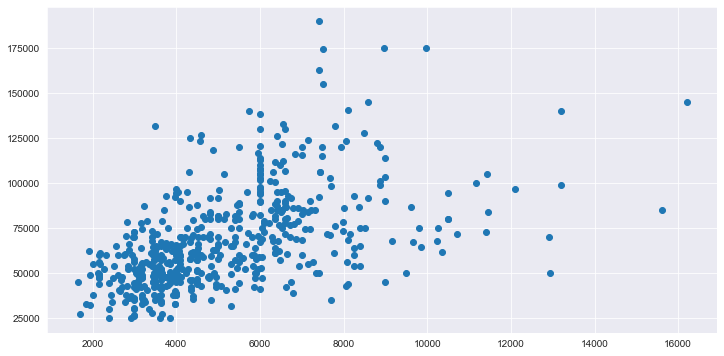

In [23]:
# Plotting the graph with most correlated independent variables
plt.scatter(house['area'], house['price'])
plt.show()

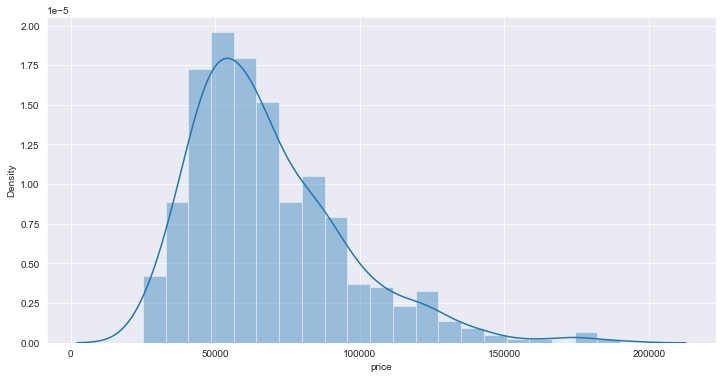

In [25]:
sns.distplot(house['price'])
plt.show()

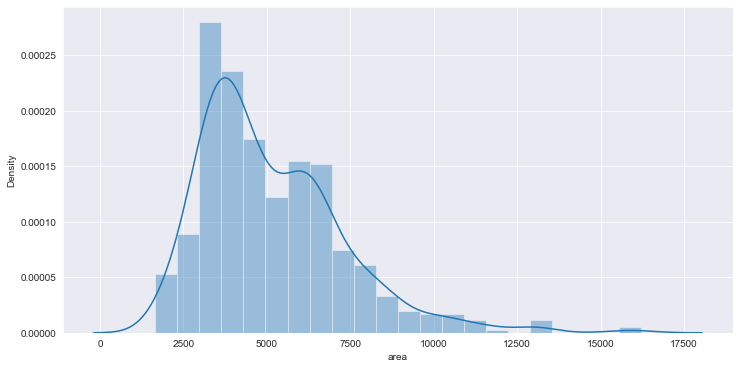

In [27]:
sns.distplot(house['area'])
plt.show()

In [40]:
# import libraries related to LInearRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
lm = LinearRegression()

In [33]:
X = house.drop(['price'], axis=1).values
y = house['price'].values

In [82]:
# Standardize the data
sc = StandardScaler()
X = sc.fit_transform(X)

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
lm.fit(X_train, y_train)

LinearRegression()

In [85]:
y_pred = lm.predict(X_test)
y_pred

array([ 67965.39055778,  66913.33565631, 109975.8073368 ,  61158.44011902,
        56327.64653371,  58151.61312818,  55973.55336425,  54269.43150634,
        98832.10215503,  48611.08929595,  78646.1834425 ,  95179.76473042,
        53624.82795496,  63566.1906301 ,  98074.03694856, 108523.5594545 ,
        77166.88378398,  40353.07238342,  89400.67770365,  54178.60229425,
        33271.36551707,  49729.63973815,  76571.45417133,  52756.67973564,
        73626.89153725,  39262.70314866,  86422.39003048,  42754.50627868,
       100859.04475166,  59969.65556986,  51312.01343866,  77074.93596408,
        74028.29195949,  92757.17729035,  61334.59457096,  53295.81704549,
        34443.79799155,  67190.0825052 ,  70946.78849416, 103443.75010887,
        43595.7350214 , 110558.61242543,  40752.2375375 ,  54707.91028046,
        77237.66559779,  58881.07946019,  56348.36629339,  55261.35070339,
        55350.48922308,  98048.1937209 ,  39351.60451815,  77407.80537511,
        77395.34745099,  

In [86]:
# The coefficients
print('Coefficients: \n', lm.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))

Coefficients: 
 [7915.17153545  704.1975957  6814.1801079  6249.36361076 2415.45741383
 1741.69080412 3041.2786902  3162.31633535 5896.84411408 3968.40353003
 3310.85560271]
Mean squared error: 256524986.52


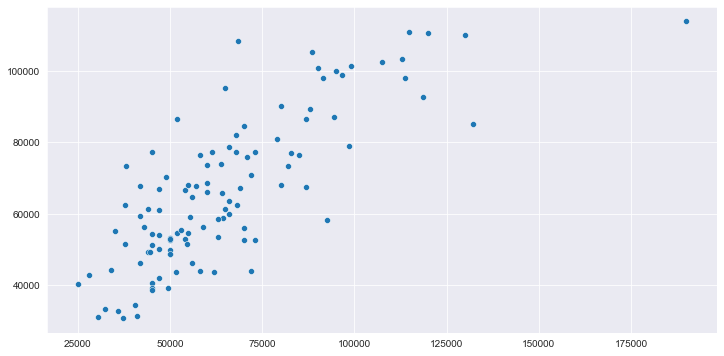

In [87]:
# To check the quality of our model, let's plot it
sns.scatterplot(y_test, y_pred)
plt.show()

# Using OLS

In [92]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [88]:
# Unlike sklearn that adds an intercept to our data for the best fit, statsmodel doesn't. We need to add it ourselves
# Remember, we want to predict the price based off our features.
# X represents our predictor variables, and y our predicted variable.
# We need now to add manually the intercepts
X_endog = sm.add_constant(X)

In [89]:
res = sm.OLS(y, X_endog)
results = res.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     99.97
Date:                Sat, 29 May 2021   Prob (F-statistic):          6.18e-122
Time:                        12:52:57   Log-Likelihood:                -6034.1
No. Observations:                 546   AIC:                         1.209e+04
Df Residuals:                     534   BIC:                         1.214e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.812e+04    660.051    103.206      0.0

In [90]:
# Extract the parametrs
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  [68121.5970696   7681.90333904  1349.65960237  7192.11811316
  5687.54112736  2327.66806048  1724.3147626   2600.30789607
  2682.07228891  5877.43118895  3652.74942358  3969.33279353]
R2:  0.6731236206414506
